# Spike Train Analysis with NWB and Elephant

Elephant is a toolbox for the analysis of electrophysiological data based on the Neo framework.

This tutorial we are going to:
1. Load a Neurodata Without Borders File from the Allen Datbase, 
2. Display its timeseries data
3. Display its spike time data
4. Perform some Analysis

In [71]:
# Load Python Packages
import h5py
import matplotlib.pyplot as plt
import neo
import numpy as np
import elephant
import seaborn as sns

## Get an NWB File

We are going to use a generic NWB file from the brain-map database, for example the file here:
http://celltypes.brain-map.org/experiment/electrophysiology/474626527

In [72]:
# Load a NWB File
nwb =  h5py.File('data/474626524_ephys.nwb')

In [83]:
# Inspect the Data File
nwb.keys()

# Find all the time series data
sweeps= nwb['acquisition']['timeseries'].keys()

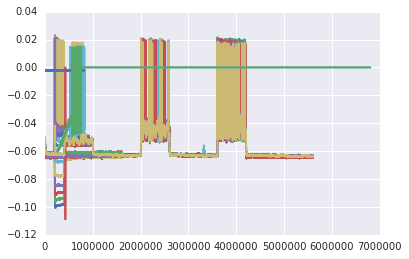

In [89]:
# Locate the time series recoding of interest
for s in sweeps:
    plt.plot(nwb['acquisition']['timeseries'][s]['data'][:])
plt.show()

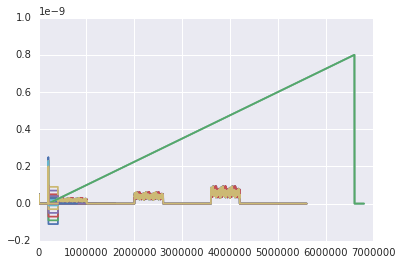

In [91]:
# Locate the stimulus recoding of interest
for s in sweeps:
    plt.plot(nwb['stimulus']['presentation'][s]['data'][:])
plt.show()


In [92]:
# Find the associated spike times
nwb['analysis']['spike_times']['Sweep_29'][:]

array([1.0317  , 1.043355, 1.0573  , 1.07508 , 1.09618 , 1.12115 ,
       1.145125, 1.16806 , 1.19175 , 1.215115, 1.24142 , 1.26634 ,
       1.29236 , 1.31865 , 1.3481  , 1.37521 , 1.40699 , 1.4348  ,
       1.469275, 1.498835, 1.531445, 1.55988 , 1.58964 , 1.617785,
       1.64896 , 1.6826  , 1.71529 , 1.752125, 1.781005, 1.81897 ,
       1.86063 , 1.89142 , 1.93023 , 1.969275, 2.006395])

In [65]:
# Convert our spike time sweeps into Spike Trains we can analise
spiketrain_list = [neo.SpikeTrain(nwb['analysis']['spike_times'][sweep][:], units='sec', t_stop=100.0) for sweep in nwb['analysis']['spike_times'].keys()]

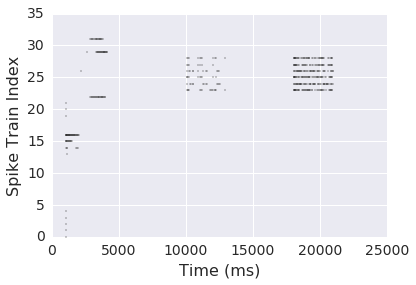

In [66]:
# Plot Spike Trains in the File
for i, spiketrain in enumerate(spiketrain_list):
        t = spiketrain.rescale(ms)
        plt.plot(t, i * np.ones_like(t), 'k.', markersize=2)

plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('Spike Train Index', fontsize=16)
plt.gca().tick_params(axis='both', which='major', labelsize=14)

plt.show()

# Calculate a PSTH
Select neurons with a step input

Extract Stimulus Aligned Spike Times

Plot Spike TimeHistogram



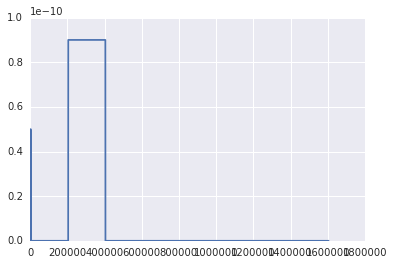

[u'aibs_stimulus_amplitude_pa',
 u'aibs_stimulus_description',
 u'aibs_stimulus_interval',
 u'aibs_stimulus_name',
 u'data',
 u'electrode_name',
 u'gain',
 u'initial_access_resistance',
 u'num_samples',
 u'seal',
 u'starting_time']

In [130]:
nwb['stimulus'].keys()
nwb['epochs']['Sweep_29']['stimulus']['timeseries'].keys()
plt.plot(nwb['epochs']['Sweep_29']['stimulus']['timeseries']['data']); plt.show()
nwb['stimulus']['presentation']['Sweep_29'].keys()

In [125]:
# Calculate Spike Dissimilarity
dissim = elephant.spike_train_dissimilarity.van_rossum_dist(spiketrain_list)

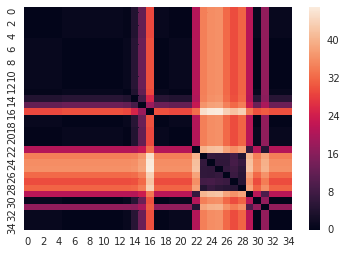

In [68]:
sns.heatmap(dissim)
plt.show()